In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Getting the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,8
plt.style.use('ggplot')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import zipfile
# from tqdm import tqdm

# zip_file_path = '/content/drive/MyDrive/data_egr598/main_data/maindata.zip'
# extract_path = '/content/drive/MyDrive/data_egr598/main_data/'

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     files = zip_ref.namelist()
#     for file in tqdm(files, desc="Extracting", unit="files"):
#         zip_ref.extract(file, extract_path)

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/data_egr598/main_data/maindata/data_02/data.csv')
df2=pd.read_csv('/content/drive/MyDrive/data_egr598/main_data/maindata/data_03/data.csv')
df3=pd.read_csv('/content/drive/MyDrive/data_egr598/main_data/maindata/data_01/data.csv')
df4=pd.read_csv('/content/drive/MyDrive/data_egr598/main_data/maindata/data/data.csv')

In [ ]:
# Remove the 'data/' prefix from the image_path column
df1['image_path'] = df1['image_path'].str.replace('data/', '')
df2['image_path'] = df2['image_path'].str.replace('data/', '')
df3['image_path'] = df3['image_path'].str.replace('data/', '')
df4['image_path'] = df4['image_path'].str.replace('data/', '')

# Add the '/content/drive/MyDrive/data_egr598/' prefix to the image_path column
df1['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_02/' + df1['image_path'].str.replace('.png', '.png')
df2['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_03/' + df2['image_path'].str.replace('.png', '.png')
df3['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_01/' + df3['image_path'].str.replace('.png', '.png')
df4['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data/' + df4['image_path'].str.replace('.png', '.png')

<ipython-input-4-2a96340dbb41>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_02/' + df1['image_path'].str.replace('.png', '.png')
<ipython-input-4-2a96340dbb41>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_03/' + df2['image_path'].str.replace('.png', '.png')
<ipython-input-4-2a96340dbb41>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_01/' + df3['image_path'].str.replace('.png', '.png')
<ipython-input-4-2a96340dbb41>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df4['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data

In [ ]:
# Add a column to each dataframe to indicate the source
df1['source'] = 'data_02'
df2['source'] = 'data_03'
df3['source'] = 'data_01'
df4['source'] = 'data'

In [ ]:
# Combine the dataframes into one dataframe
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.head()

,timestamp,image_path,linear_x,angular_z,source
0,1.681957e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data_02
1,1.681957e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data_02
2,1.681957e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data_02
3,1.681957e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data_02
4,1.681957e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data_02


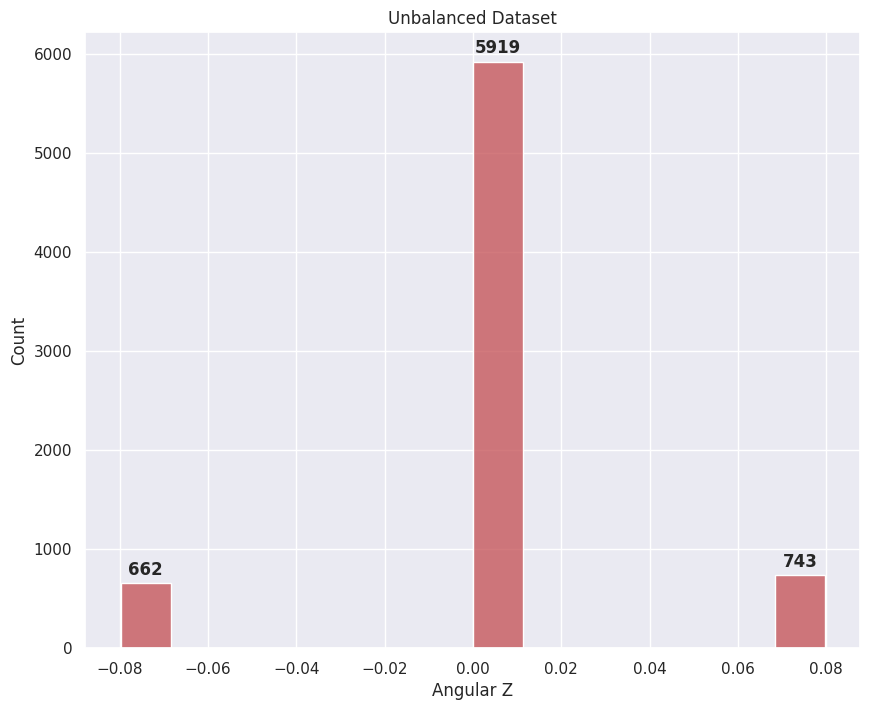

In [ ]:
# Plot histogram using Seaborn
ax = sns.histplot(data=df, x='angular_z', color='r')

# Add axis labels and title
plt.xlabel('Angular Z')
plt.ylabel('Count')
plt.title('Unbalanced Dataset')

# Add annotations to non-zero bars
for rect in ax.patches:
    # Get the height of the bar
    height = rect.get_height()
    
    # Add the annotation on top of the bar with bold font if height is greater than 0
    if height > 0:
        ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.show()

In [ ]:
df['angular_z'].value_counts()

 0.000000    5919
 0.079766     743
-0.079766     662
Name: angular_z, dtype: int64

In [ ]:
# Get 1200 samples for each unique value of angular_z, except for 0.00000
sample_size = 450
unique_z = df['angular_z'].unique()

sampled_data = pd.concat([
    df[df['angular_z'] == z].sample(n=sample_size, random_state=42, replace=True)
    if z != 0.0 else
    df[df['angular_z'] == z].sample(n=900, random_state=42, replace=True)
    for z in unique_z
])

# Reset the index of the sampled data
sampled_data = sampled_data.reset_index(drop=True)

In [ ]:
sampled_data['angular_z'].value_counts()

 0.000000    900
 0.079766    450
-0.079766    450
Name: angular_z, dtype: int64

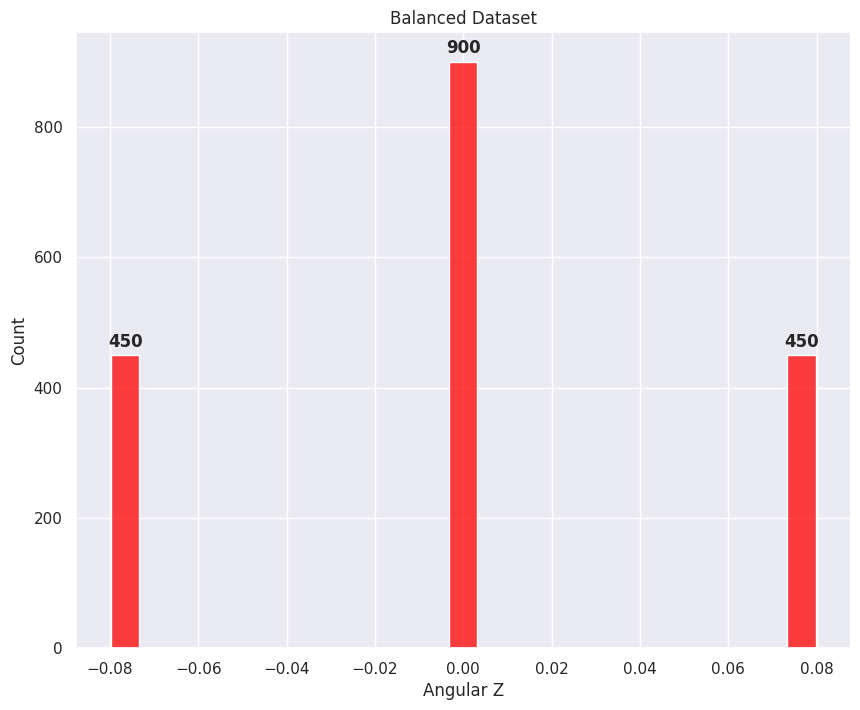

In [ ]:
# Plot histogram using Seaborn
ax = sns.histplot(data=sampled_data, x='angular_z', color='red')

# Add axis labels and title
plt.xlabel('Angular Z')
plt.ylabel('Count')
plt.title('Balanced Dataset')

# Add annotations to non-zero bars
for rect in ax.patches:
    # Get the height of the bar
    height = rect.get_height()
    
    # Add the annotation on top of the bar with bold font if height is greater than 0
    if height > 0:
        ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.show()

# Build the model

In [ ]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   1800 non-null   float64
 1   image_path  1800 non-null   object 
 2   linear_x    1800 non-null   float64
 3   angular_z   1800 non-null   float64
 4   source      1800 non-null   object 
dtypes: float64(3), object(2)
memory usage: 70.4+ KB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tqdm import tqdm  # Import the tqdm library
from concurrent.futures import ThreadPoolExecutor

# Preprocess the images
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    return img_array

# Process images in parallel
def process_images_parallel(image_paths, target_size=(224, 224)):
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(preprocess_image, img_path, target_size) for img_path in image_paths]
        results = [f.result() for f in tqdm(futures, desc="Processing images")]
    return results

images = np.array(process_images_parallel(sampled_data["image_path"]))

# Preprocess the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(sampled_data["angular_z"])
labels = to_categorical(labels)

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # We have 3 distinct labels
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Processing images: 100%|██████████| 1800/1800 [00:41<00:00, 42.99it/s]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# Save the model
model.save("my_model.h5")

In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(X_val, y_val)

print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

# Predict the angular_z values for the validation images
y_val_pred_prob = model.predict(X_val)

# Convert the predictions to label indices
y_val_pred_indices = np.argmax(y_val_pred_prob, axis=1)

# Convert the label indices back to original angular_z values
y_val_pred = label_encoder.inverse_transform(y_val_pred_indices)

# Convert the one-hot encoded y_val back to original angular_z values
y_val_original = label_encoder.inverse_transform(np.argmax(y_val, axis=1))

# Calculate the accuracy
accuracy = np.mean(y_val_original == y_val_pred)
print(f"Accuracy on validation set: {accuracy:.2%}")

# Compare the actual angular_z with the predicted angular_z
comparison = pd.DataFrame({"Actual": y_val_original, "Predicted": y_val_pred})
print(comparison.head())


12/12 [==============================] - 0s 24ms/step - loss: 0.1716 - accuracy: 0.9639
Validation Loss: 0.1715652197599411
Validation Accuracy: 0.9638888835906982
12/12 [==============================] - 0s 19ms/step
Accuracy on validation set: 96.39%
     Actual  Predicted
0 -0.079766  -0.079766
1  0.079766   0.079766
2  0.000000   0.000000
3  0.000000   0.000000
4  0.079766   0.079766


## Test the base model

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/data_egr598/main_data/maindata/data/data.csv')

# Remove the 'data/' prefix from the image_path column
test_df['image_path'] = test_df['image_path'].str.replace('data/', '')


# Add the '/content/drive/MyDrive/data_egr598/' prefix to the image_path column
test_df['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data/' + test_df['image_path'].str.replace('.png', '.png')


<ipython-input-17-14c3dd6479d6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data/' + test_df['image_path'].str.replace('.png', '.png')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm  # Import the tqdm library
from concurrent.futures import ThreadPoolExecutor

# Preprocess the images
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    return img_array

# Process images in parallel
def process_images_parallel(image_paths, target_size=(224, 224)):
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(preprocess_image, img_path, target_size) for img_path in image_paths]
        results = [f.result() for f in tqdm(futures, desc="Processing images")]
    return results

images = np.array(process_images_parallel(test_df["image_path"]))

# Preprocess the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(test_df["angular_z"])
labels = to_categorical(labels)

# Assuming the images are loaded and preprocessed into X_test and corresponding angular_z values are in y_test
X_test, y_test = images, labels

# Predict the angular_z values for the test images
y_test_pred_prob = model.predict(X_test)

# Convert the predictions to label indices
y_test_pred_indices = np.argmax(y_test_pred_prob, axis=1)

# Convert the label indices back to original angular_z values
y_test_pred = label_encoder.inverse_transform(y_test_pred_indices)

# Convert the one-hot encoded y_test back to original angular_z values
y_test_original = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

# Calculate the accuracy
accuracy = np.mean(y_test_original == y_test_pred)
print(f"Accuracy on test set: {accuracy:.2%}")

# Compare the actual angular_z with the predicted angular_z
comparison = pd.DataFrame({"Actual": y_test_original, "Predicted": y_test_pred})
print(comparison.head())

Processing images: 100%|██████████| 1798/1798 [00:48<00:00, 37.10it/s]


57/57 [==============================] - 1s 20ms/step
Accuracy on test set: 75.86%
   Actual  Predicted
0     0.0        0.0
1     0.0        0.0
2     0.0        0.0
3     0.0        0.0
4     0.0        0.0


# Transfer learning model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.applications import VGG16


# Load the VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # We have 3 distinct labels
])

model.summary()

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Learning rate scheduling
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_callback = LearningRateScheduler(lr_scheduler)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_callback, early_stopping])


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 27,561,795
Trainable params: 12,847,107
Non-trainable params: 14,714,688
__________________________________

In [ ]:
# Save the model
model.save("my_model_transfer.h5")

In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(X_val, y_val)

print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)


12/12 [==============================] - 2s 122ms/step - loss: 0.2586 - accuracy: 0.9111
Validation Loss: 0.2586304247379303
Validation Accuracy: 0.9111111164093018


In [ ]:
# Predict the angular_z values for the validation images
y_val_pred_prob = model.predict(X_val)

# Convert the predictions to label indices
y_val_pred_indices = np.argmax(y_val_pred_prob, axis=1)

# Convert the label indices back to original angular_z values
y_val_pred = label_encoder.inverse_transform(y_val_pred_indices)

# Convert the one-hot encoded y_val back to original angular_z values
y_val_original = label_encoder.inverse_transform(np.argmax(y_val, axis=1))

# Calculate the accuracy
accuracy = np.mean(y_val_original == y_val_pred)
print(f"Accuracy on validation set: {accuracy:.2%}")

# Compare the actual angular_z with the predicted angular_z
comparison = pd.DataFrame({"Actual": y_val_original, "Predicted": y_val_pred})
print(comparison.head())


12/12 [==============================] - 2s 121ms/step
Accuracy on validation set: 91.11%
     Actual  Predicted
0 -0.079766  -0.079766
1  0.079766   0.079766
2  0.000000   0.000000
3  0.000000   0.000000
4  0.079766   0.079766


In [ ]:
comparison.head(20)

,Actual,Predicted
0,-0.079766,-0.079766
1,0.079766,0.079766
2,0.000000,0.000000
3,0.000000,0.000000
4,0.079766,0.079766
5,0.000000,0.000000
6,0.000000,0.079766
7,0.000000,0.000000
8,-0.079766,-0.079766
9,0.079766,0.079766


## Test the transfer learning model

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/data_egr598/main_data/maindata/data/data.csv')

# Remove the 'data/' prefix from the image_path column
test_df['image_path'] = test_df['image_path'].str.replace('data/', '')


# Add the '/content/drive/MyDrive/data_egr598/' prefix to the image_path column
test_df['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data/' + test_df['image_path'].str.replace('.png', '.png')


<ipython-input-24-14c3dd6479d6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data/' + test_df['image_path'].str.replace('.png', '.png')


In [ ]:
test_df['image_path'][1]

'/content/drive/MyDrive/data_egr598/main_data/maindata/data/1681957757.573238.png'

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   1798 non-null   float64
 1   image_path  1798 non-null   object 
 2   linear_x    1798 non-null   float64
 3   angular_z   1798 non-null   float64
dtypes: float64(3), object(1)
memory usage: 56.3+ KB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm  # Import the tqdm library
from concurrent.futures import ThreadPoolExecutor

# Preprocess the images
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    return img_array

# Process images in parallel
def process_images_parallel(image_paths, target_size=(224, 224)):
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(preprocess_image, img_path, target_size) for img_path in image_paths]
        results = [f.result() for f in tqdm(futures, desc="Processing images")]
    return results

images = np.array(process_images_parallel(test_df["image_path"]))

# Preprocess the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(test_df["angular_z"])
labels = to_categorical(labels)

# Assuming the images are loaded and preprocessed into X_test and corresponding angular_z values are in y_test
X_test, y_test = images, labels

# Predict the angular_z values for the test images
y_test_pred_prob = model.predict(X_test)

# Convert the predictions to label indices
y_test_pred_indices = np.argmax(y_test_pred_prob, axis=1)

# Convert the label indices back to original angular_z values
y_test_pred = label_encoder.inverse_transform(y_test_pred_indices)

# Convert the one-hot encoded y_test back to original angular_z values
y_test_original = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

# Calculate the accuracy
accuracy = np.mean(y_test_original == y_test_pred)
print(f"Accuracy on test set: {accuracy:.2%}")

# Compare the actual angular_z with the predicted angular_z
comparison = pd.DataFrame({"Actual": y_test_original, "Predicted": y_test_pred})
print(comparison.head())


Processing images: 100%|██████████| 1798/1798 [00:04<00:00, 428.32it/s]


57/57 [==============================] - 8s 145ms/step
Accuracy on test set: 87.71%
   Actual  Predicted
0     0.0        0.0
1     0.0        0.0
2     0.0        0.0
3     0.0        0.0
4     0.0        0.0


In [ ]:
# Find the mismatched rows
mismatches = comparison[comparison["Actual"] != comparison["Predicted"]]
mismatches

,Actual,Predicted
384,0.000000,0.079766
385,0.000000,0.079766
386,0.000000,0.079766
388,0.079766,0.000000
389,0.079766,0.000000
...,...,...
1465,0.000000,-0.079766
1466,0.000000,-0.079766
1468,0.000000,-0.079766
1469,0.000000,-0.079766


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   1798 non-null   float64
 1   image_path  1798 non-null   object 
 2   linear_x    1798 non-null   float64
 3   angular_z   1798 non-null   float64
dtypes: float64(3), object(1)
memory usage: 56.3+ KB
